# 计算机模拟第四周作业

## 证明

由于 $ S \sim b(n, \lambda), \lambda = \lambda(R)$，计算可得 $S$ 的各阶矩：

$$ E[S] = {\lambda}n $$
$$ E[S^2] = \lambda(1-\lambda)n + {\lambda^2}n^2 $$
$$ E[S^3] = (1-3\lambda+2\lambda^2){\lambda}n + 3{\lambda^2}(1-\lambda)n^2 + {\lambda^3}n^3 $$
$$ E[S^4] = (1-7\lambda+12\lambda^2-6\lambda^3){\lambda}n + {\lambda^2}(7-18\lambda+11\lambda^2)n^2 + 6{\lambda^3}(1-\lambda)n^3 + {\lambda^4}n^4 $$

从而，$\lambda \not= 1/2$ 时：

\begin{equation}
\begin{split}
cov(\bar{\lambda}_n, V[\bar{\lambda}_n]) &= \frac{1}{(n-1)n^3}cov(S, S(n-S)) \\
&=\frac{1}{(n-1)n^3}(E[S^2(n-S)]-E[S]E[S(n-S)]) \\
&=\frac{1}{(n-1)n^3}(nE[S^2] + E[S]E[S^2] - nE[S]^2 - E[S^3]) \\
&=\frac{1}{(n-1)n}\lambda(1-2\lambda)(1-\lambda) + o(n^{-2})
\end{split}
\end{equation}

另外：

\begin{equation}
\begin{split}
Var[\bar{\lambda}_n] &= \frac{1}{n}\lambda(1-\lambda)
\end{split}
\end{equation}

以及：

\begin{equation}
\begin{split}
Var[V[\bar{\lambda}_n]] &= \frac{1}{{(n-1)^2}{n^4}}Var[S(n-S)] \\
&=\frac{1}{{(n-1)^2}{n^4}}({n^2}E[S^2] - 2nE[S^3] + E[S^4] - {n^2}E[S]^2 + 2nE[S]E[S^2] - E[S^2]^2) \\
&=\frac{1}{{(n-1)^2}n}\lambda(1-\lambda)(1-2\lambda)^2 + o(n^{-3})
\end{split}
\end{equation}

代入并令 $n \rightarrow \infty$，可得：

\begin{equation}
\begin{split}
\mathop{lim}_{n \rightarrow \infty}corr(\bar{\lambda}_n, V[\bar{\lambda}_n]) 
&= \mathop{lim}_{n \rightarrow \infty} \frac{cov(\bar{\lambda}_n, V[\bar{\lambda}_n])}{\sqrt{Var[\bar{\lambda}_n] Var[V[\bar{\lambda}_n]]}} \\
&= \mathop{lim}_{n \rightarrow \infty} \frac{\frac{1}{(n-1)n}\lambda(1-2\lambda)(1-\lambda) + o(n^{-2})}{\sqrt{\frac{1}{{(n-1)^2}n^2}{\lambda^2}{(1-2\lambda)^2}(1-\lambda)^2 + o(n^{-4})}} \\
&= sign(1-2\lambda)
\end{split}
\end{equation}

$\lambda = 1/2$ 的情形类似可证。

## 上述结果的影响

从上述结果可以看出，当 $\lambda \not= 1/2$ 时，并且取样次数足够大时，$\bar{\lambda}_n$ 与 $V[\bar{\lambda}_n]$ 会呈现出线性相关的趋势。下面用第一章中计算圆面积的程序来说明这会带来什么坏处。该程序中，$\lambda > 1/2$，因此 $\bar{\lambda}_n$ 与 $V[\bar{\lambda}_n]$ 应该为负相关的。首先定义用 Monte Carlo 方法计算圆面积的函数：

In [1]:
from __future__ import print_function, division

# 这句话是非标准的python，用于ipthon或jupyter这样的系统中，表示绘图即刻自动展开。
%matplotlib inline

# 这里把全部Warning过滤掉了. 
# 参见https://docs.python.org/2/library/warnings.html
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

def area_circle(times):
    inside = 0
    dots = np.random.rand(2, times)
    for i in range(times):
        x = dots[0, i] - 0.5
        y = dots[1, i] - 0.5
        if x * x + y * y < 0.25:
            inside += 1
    return inside / times, (inside/times)*(1-inside/times)/(times-1)

然后对相同的抽样次数，重复计算 100 次：

In [2]:
area = []
error = []
for i in range(1, 100):
    area_tmp, error_tmp = area_circle(10000)
    area.append(area_tmp)
    error.append(error_tmp)

对这 100 次计算结果，我们可以绘制出反映 $\bar{\lambda}_n$ 与 $V[\bar{\lambda}_n]$ 关系的折线图，如下所示。可以看到几乎完全呈现线性。因此，当估计值较大 (此处为超过 $\pi / 4$) 时，得到的误差估计反而较小，这不符合我们设想的：误差越大，误差估计值越大。当 $\lambda \not= 1/2$ 时也有类似的影响。因此，这不是一个好的误差估计。

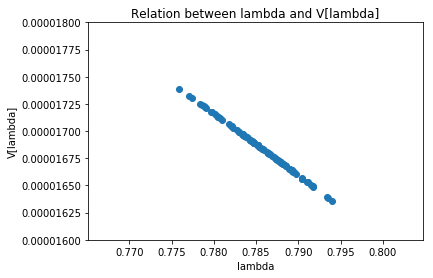

In [6]:
plt.title(u'Relation between lambda and V[lambda]')
plt.xlabel(u'lambda')
plt.ylabel(u'V[lambda]')
plt.scatter(area, error)
plt.ylim((1.6e-05, 1.8e-05))
plt.show()